# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


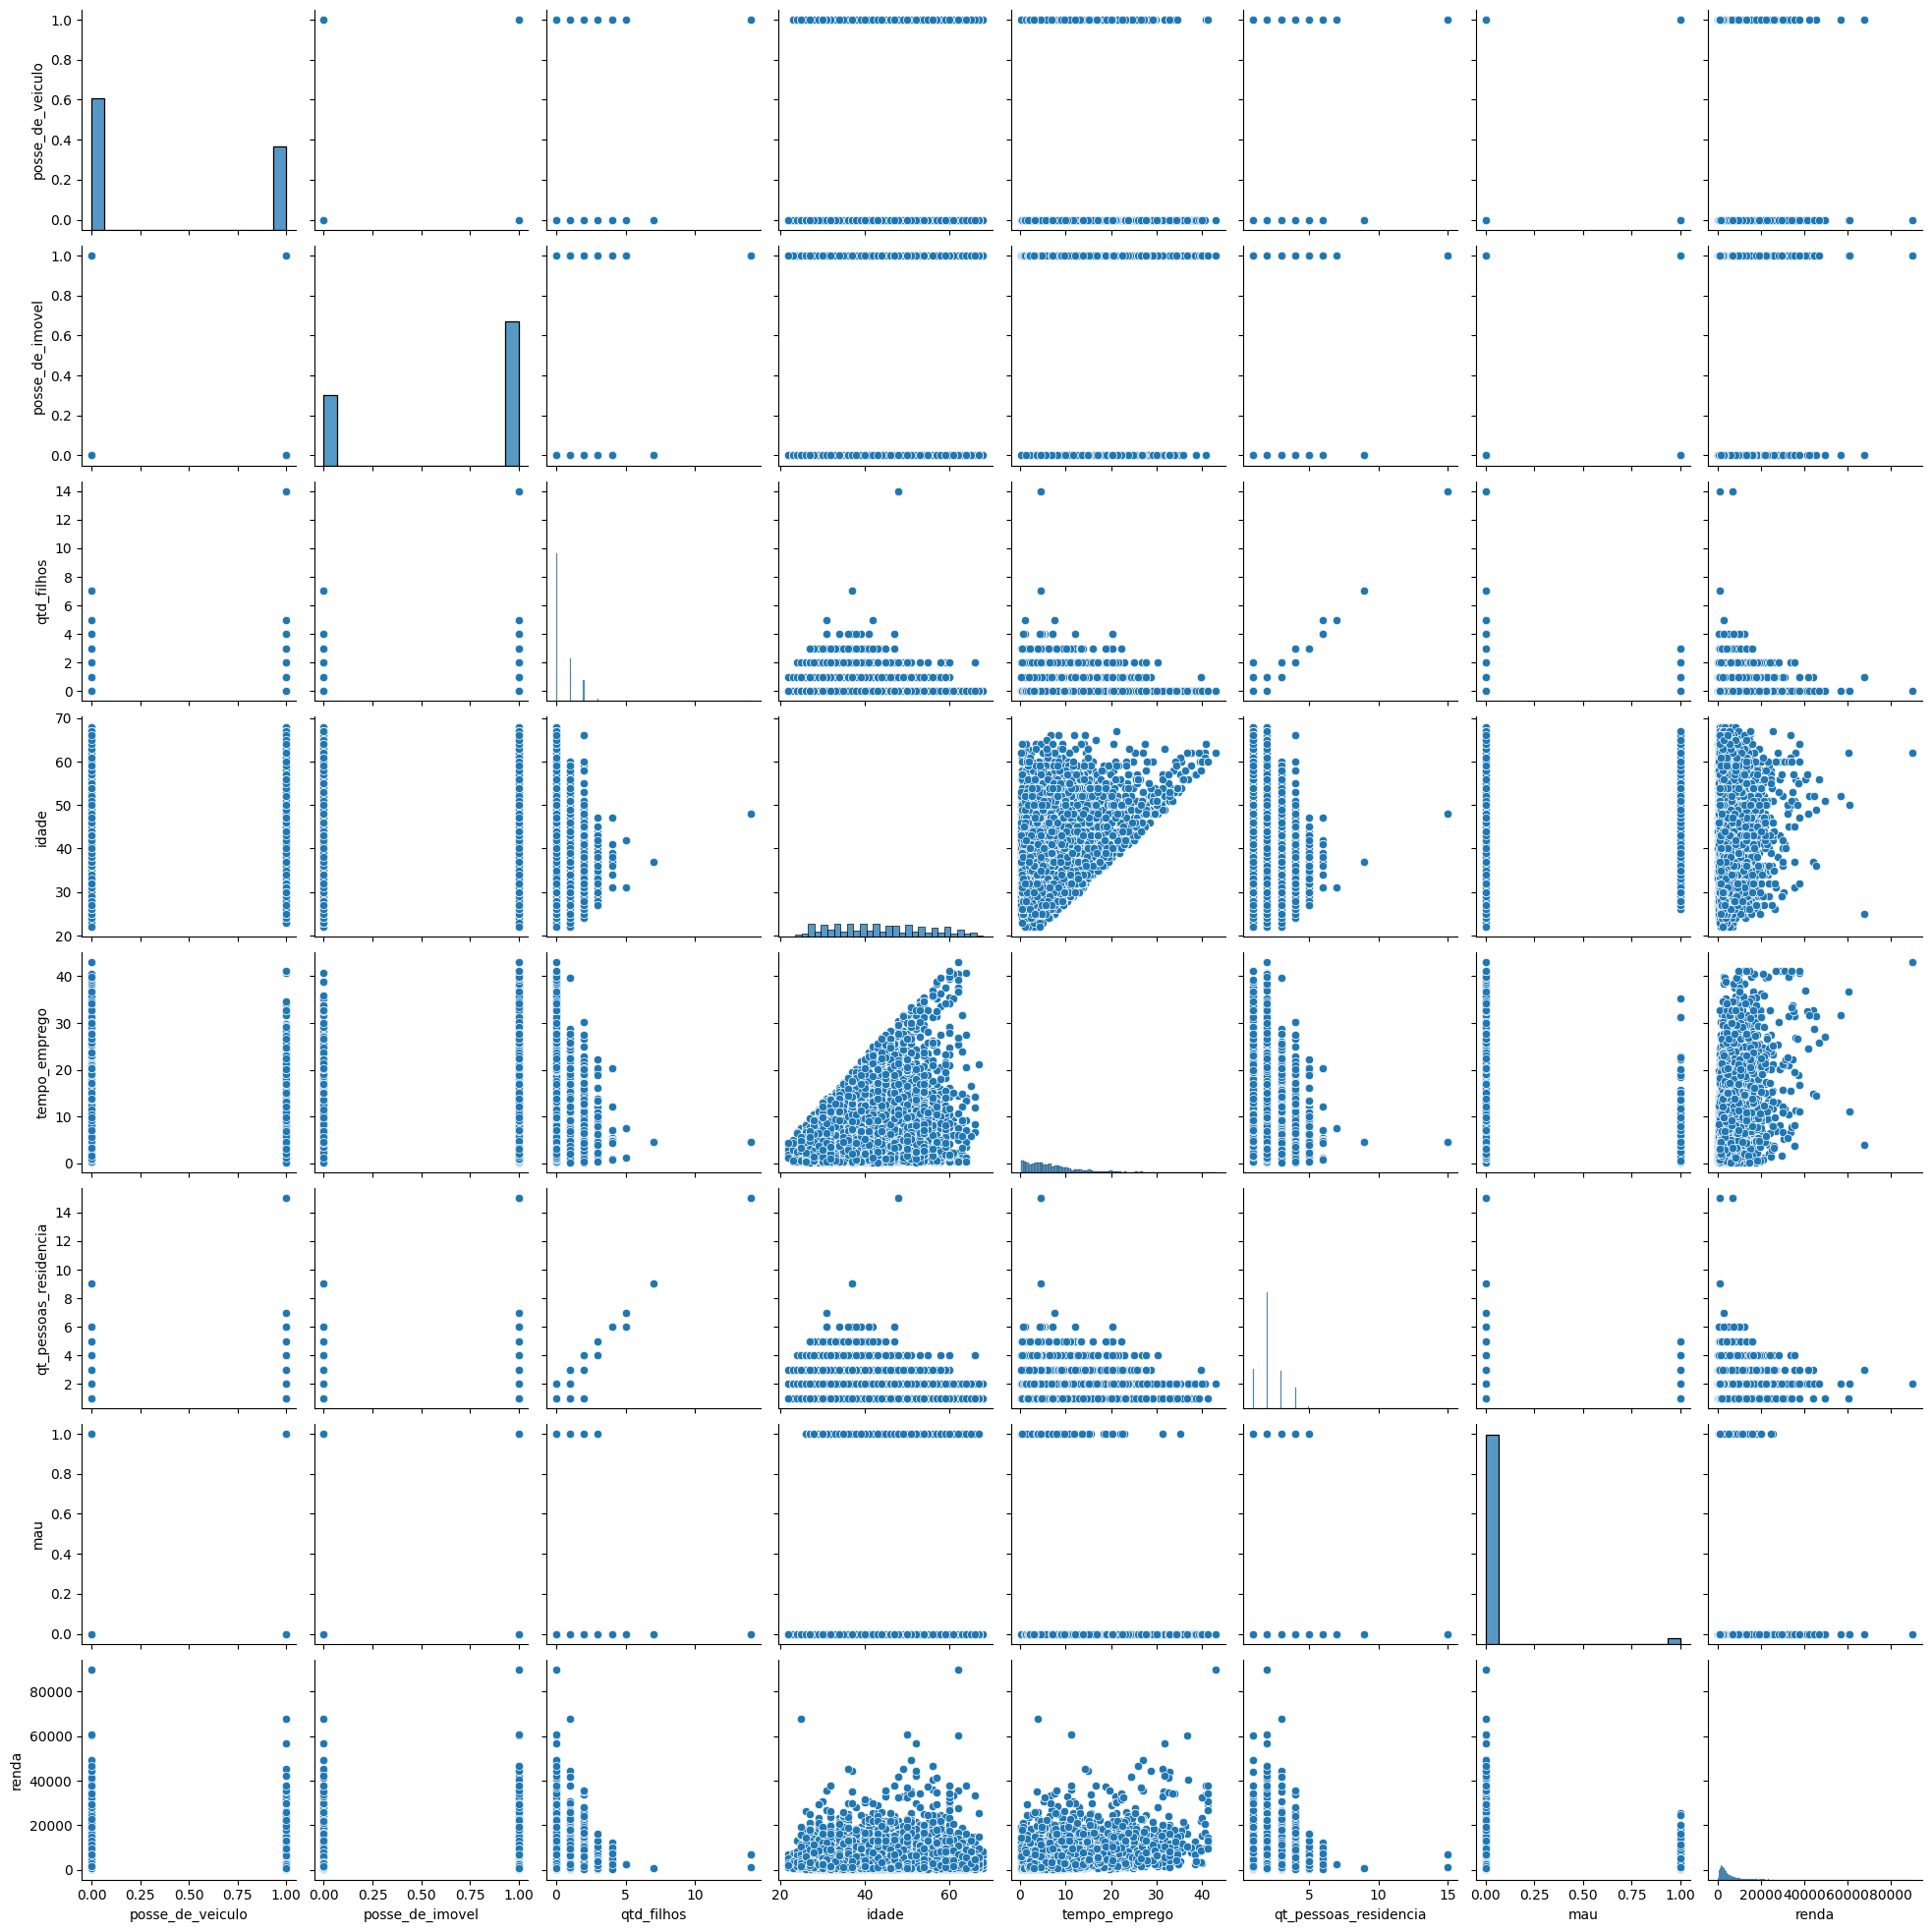

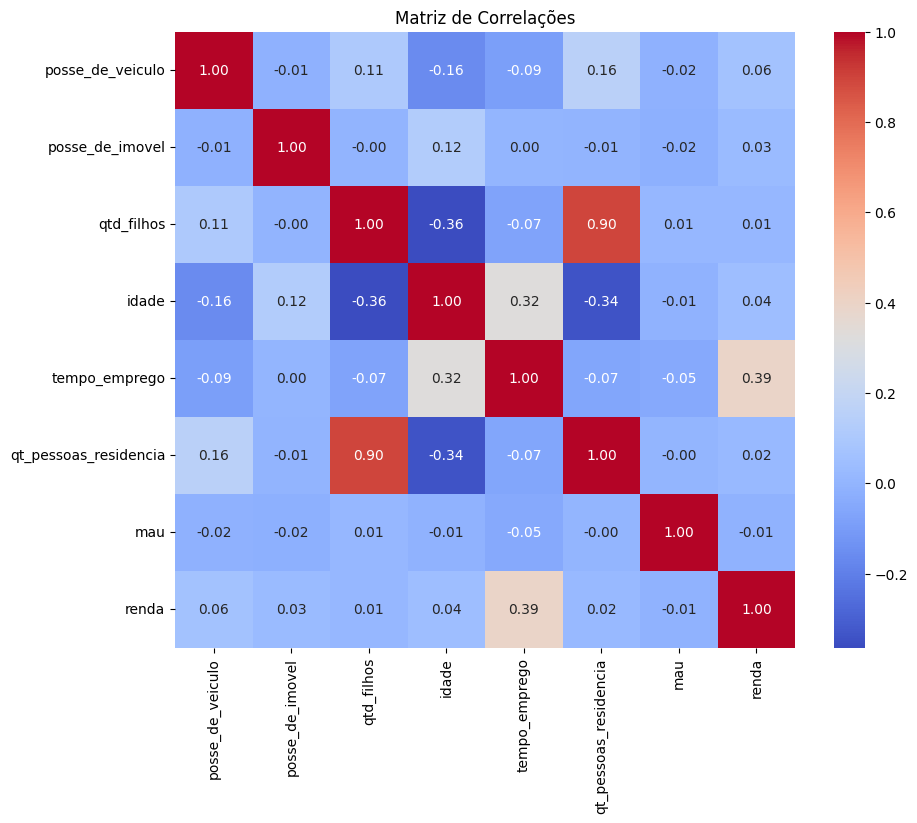

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando arquivo CSV em um dataframe
df = pd.read_csv('previsao_de_renda.csv')

#Removendo colunas Unnamed e Index
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

# Selecionando apenas as variáveis quantitativas (numéricas)
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Plotando a matriz de dispersão para avaliação das correlações entre as variáveis
sns.pairplot(df_numeric)
plt.show()


#Calculando a matriz de correlações
correlation_matrix = df_numeric.corr()

#Criando matriz em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlações')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


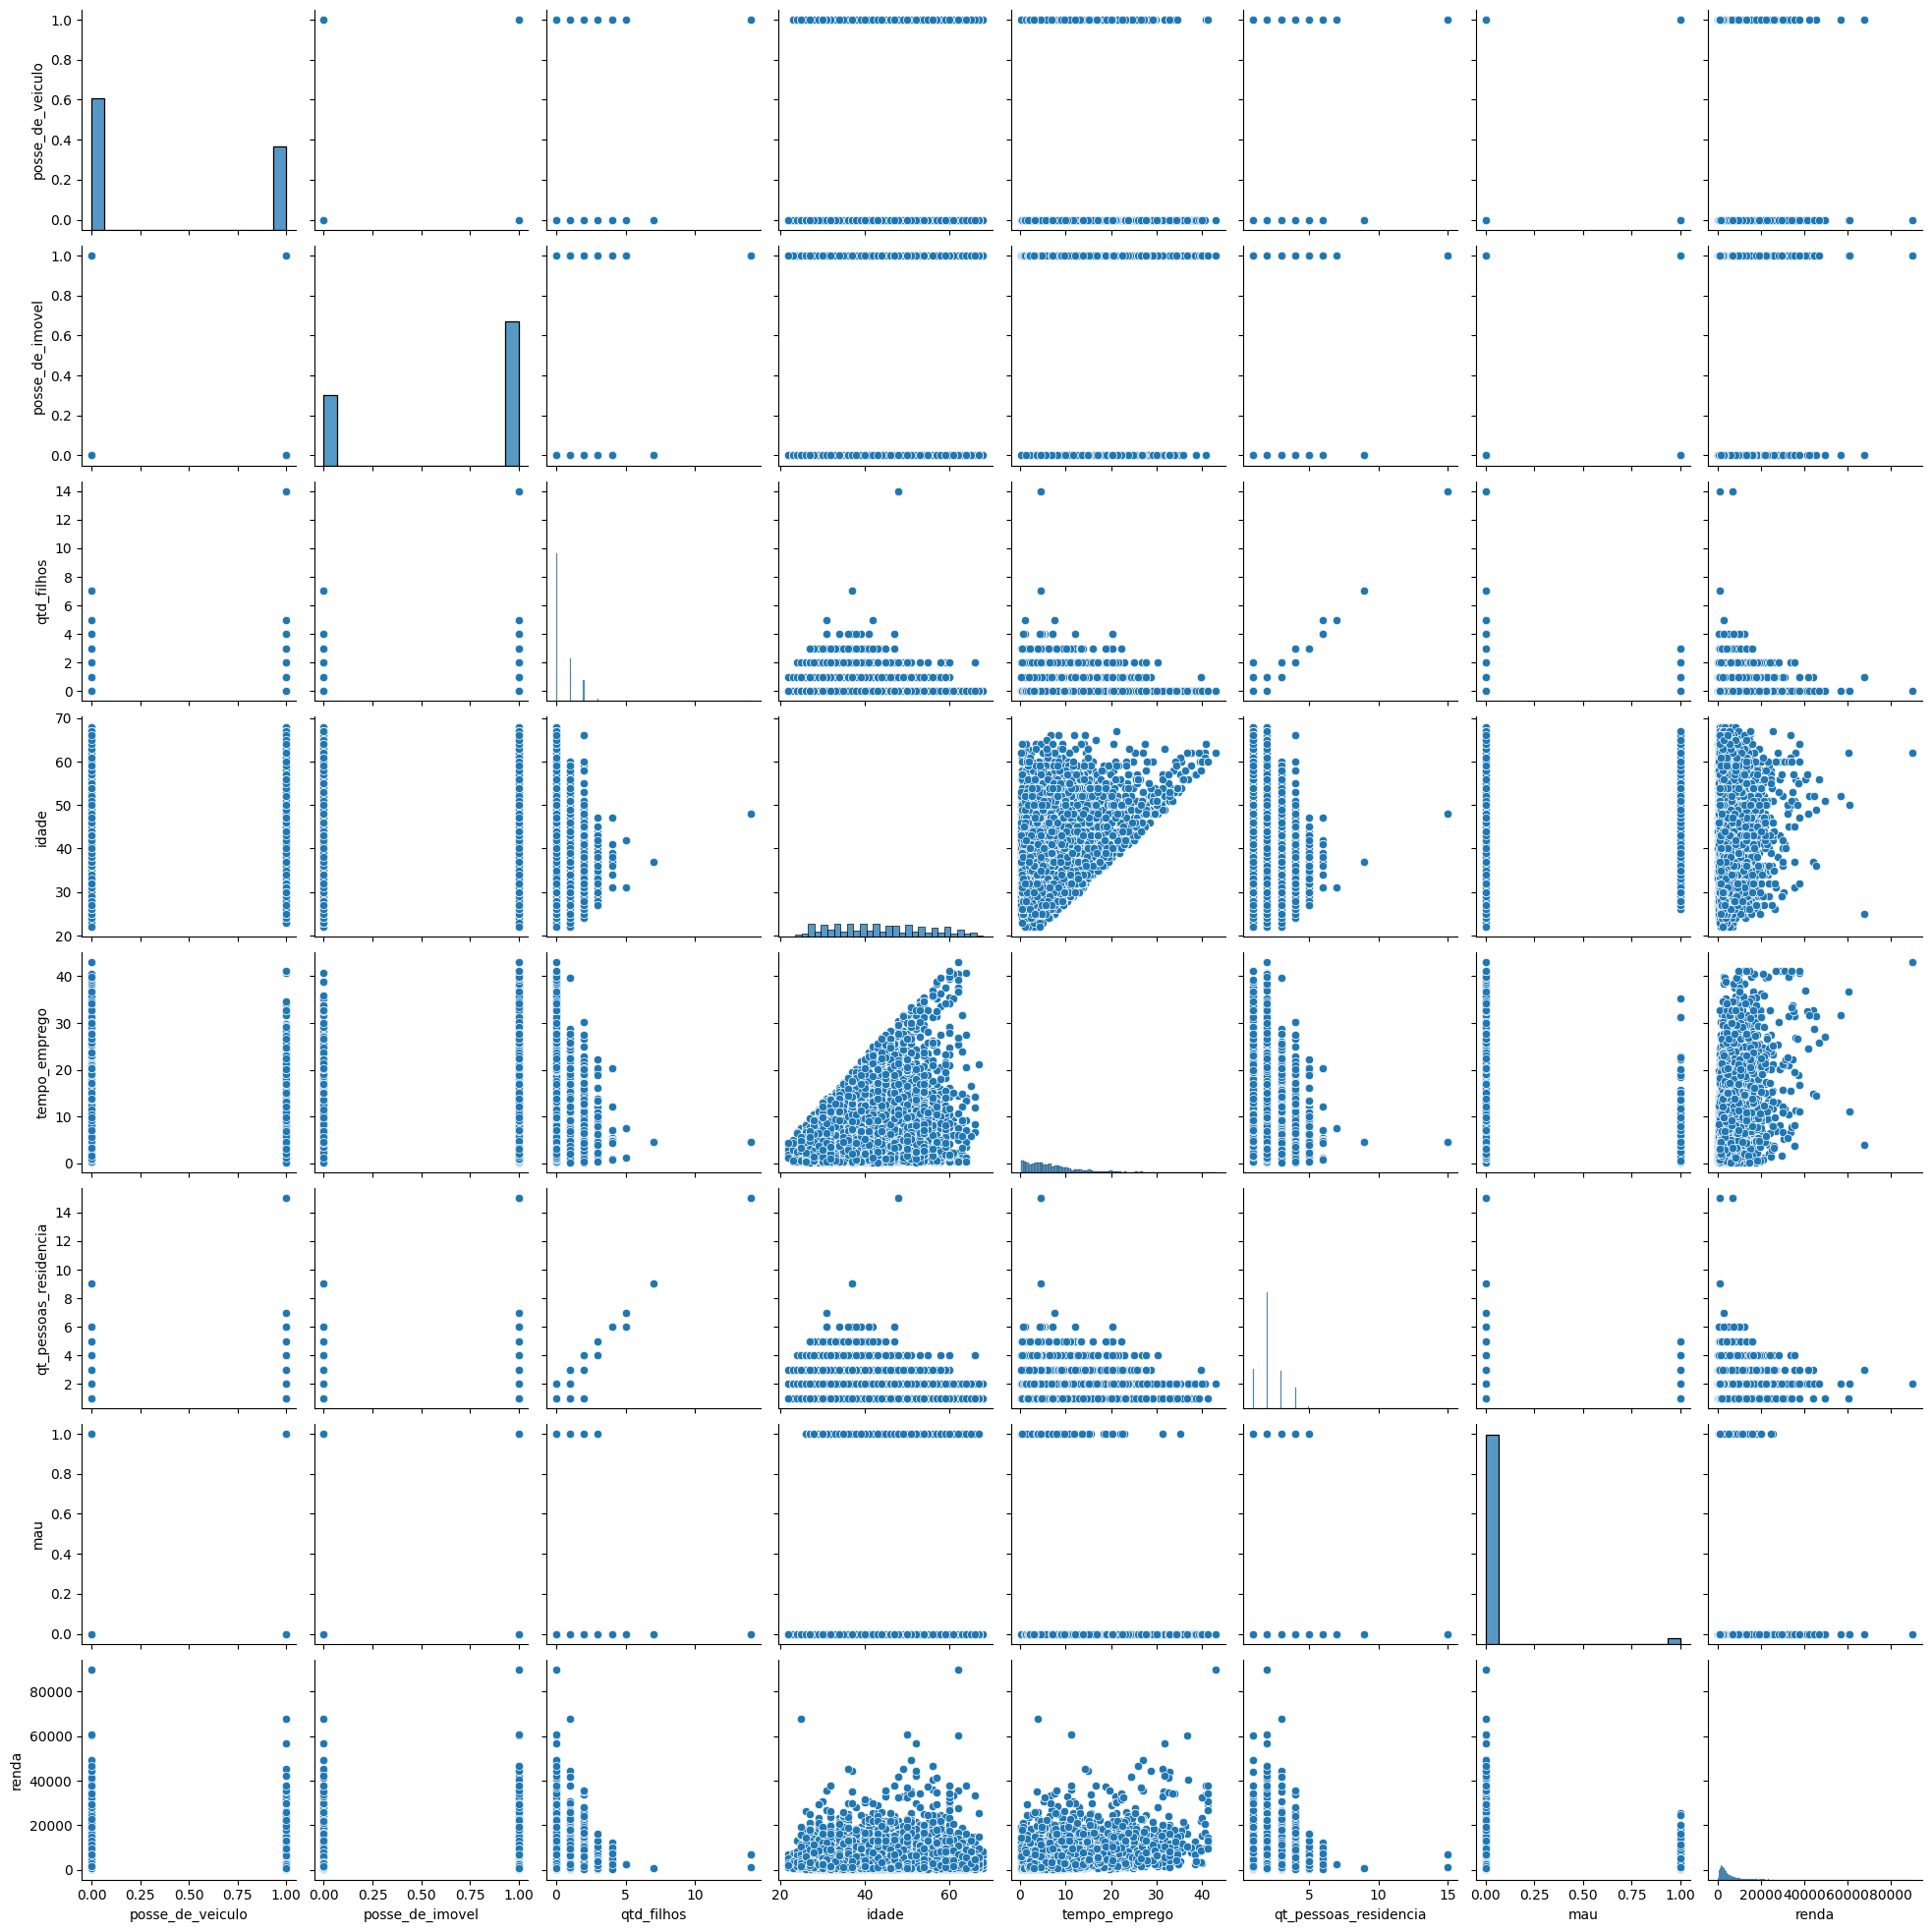

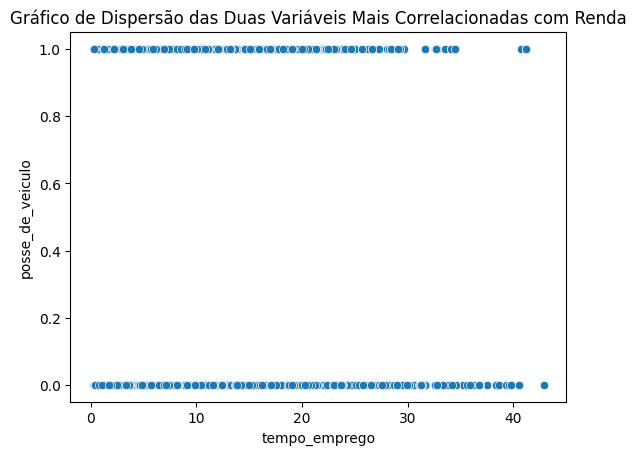

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV em um DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'index', se estiver presente (caso ela seja um identificador sequencial)
#df = df.drop(columns=['index'], errors='ignore')


#Removendo colunas Unnamed e Index
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

# Selecionando apenas as variáveis quantitativas (numéricas)
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool'])

 #Convertendo colunas para numéricos e preenchendo NaN em outros valores
df = df.apply(pd.to_numeric, errors='coerce') 
# Plotando a matriz de dispersão para avaliação das correlações entre as variáveis
sns.pairplot(df_numeric)
plt.show()


# Gerar a matriz de correlação
correlation_matrix = df.corr()

# Identificar as duas variáveis mais correlacionadas com 'renda'
# Desconsiderar a diagonal principal da matriz (correlação das variáveis com elas mesmas)
correlation_with_renda = correlation_matrix['renda'].drop('renda')
most_correlated_vars = correlation_with_renda.abs().nlargest(2).index

# Criar o gráfico de dispersão das duas variáveis mais correlacionadas com 'renda'
sns.scatterplot(data=df, x=most_correlated_vars[0], y=most_correlated_vars[1])
plt.xlabel(most_correlated_vars[0])
plt.ylabel(most_correlated_vars[1])
plt.title("Gráfico de Dispersão das Duas Variáveis Mais Correlacionadas com Renda")
plt.show()




In [ ]:
# Calcular a matriz de correlações
correlation_matrix = df.corr()

# Identificar as duas variáveis mais correlacionadas com "renda"
correlation_with_renda = correlation_matrix['renda'].sort_values(ascending=False)
top_2_correlated_vars = correlation_with_renda.index[1:3]


# Plotar o scatterplot das duas variáveis mais correlacionadas com "renda"
sns.scatterplot(x=top_2_correlated_vars[0], y=top_2_correlated_vars[1], data=df)
plt.xlabel(top_2_correlated_vars[0])
plt.ylabel(top_2_correlated_vars[1])
plt.title(f"Scatterplot entre {top_2_correlated_vars[0]} e {top_2_correlated_vars[1]} em relação à renda")
plt.show()

3) Na su aopinião, há outliers na variável renda?

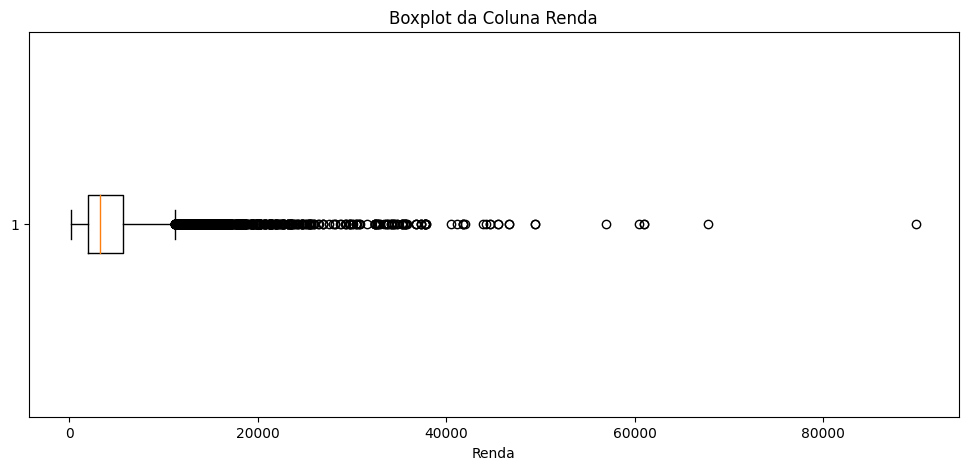

Valores considerados outliers na coluna 'renda':
22       44277.19
23       24664.37
62       19324.31
82       33568.12
113      67794.54
           ...   
14886    29387.94
14930    37703.55
14965    19929.60
14974    22223.14
14978    19275.37
Name: renda, Length: 263, dtype: float64


In [19]:

import pandas as pd
import matplotlib.pyplot as plt

#Carregando arquivo CSV em um dataframe
df = pd.read_csv('previsao_de_renda.csv')

# Plotar um boxplot para a coluna "renda" (Tornando a visualização melhor sobre a renda média)
plt.figure(figsize=(12, 5))
plt.boxplot(df['renda'], vert=False)
plt.xlabel('Renda')
plt.title('Boxplot da Coluna Renda')
plt.show()

from scipy import stats

#Calculando o Z-Score da coluna "renda"
z_scores = stats.zscore(df['renda'])
# Identificar os índices dos outliers com Z-Score acima de 3 ou abaixo de -3 (valor arbitrário)
outliers_indices = df.index[abs(z_scores) > 3]

#Mostrando os valores outliers
outliers_renda = df.loc[outliers_indices, 'renda']
print("Valores considerados outliers na coluna 'renda':")
print(outliers_renda)

In [ ]:
# Calculando estatísticas descritivas da variável "renda"
desc_stats = df['renda'].describe()

# Exibindo as estatísticas descritivas
print(desc_stats)

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


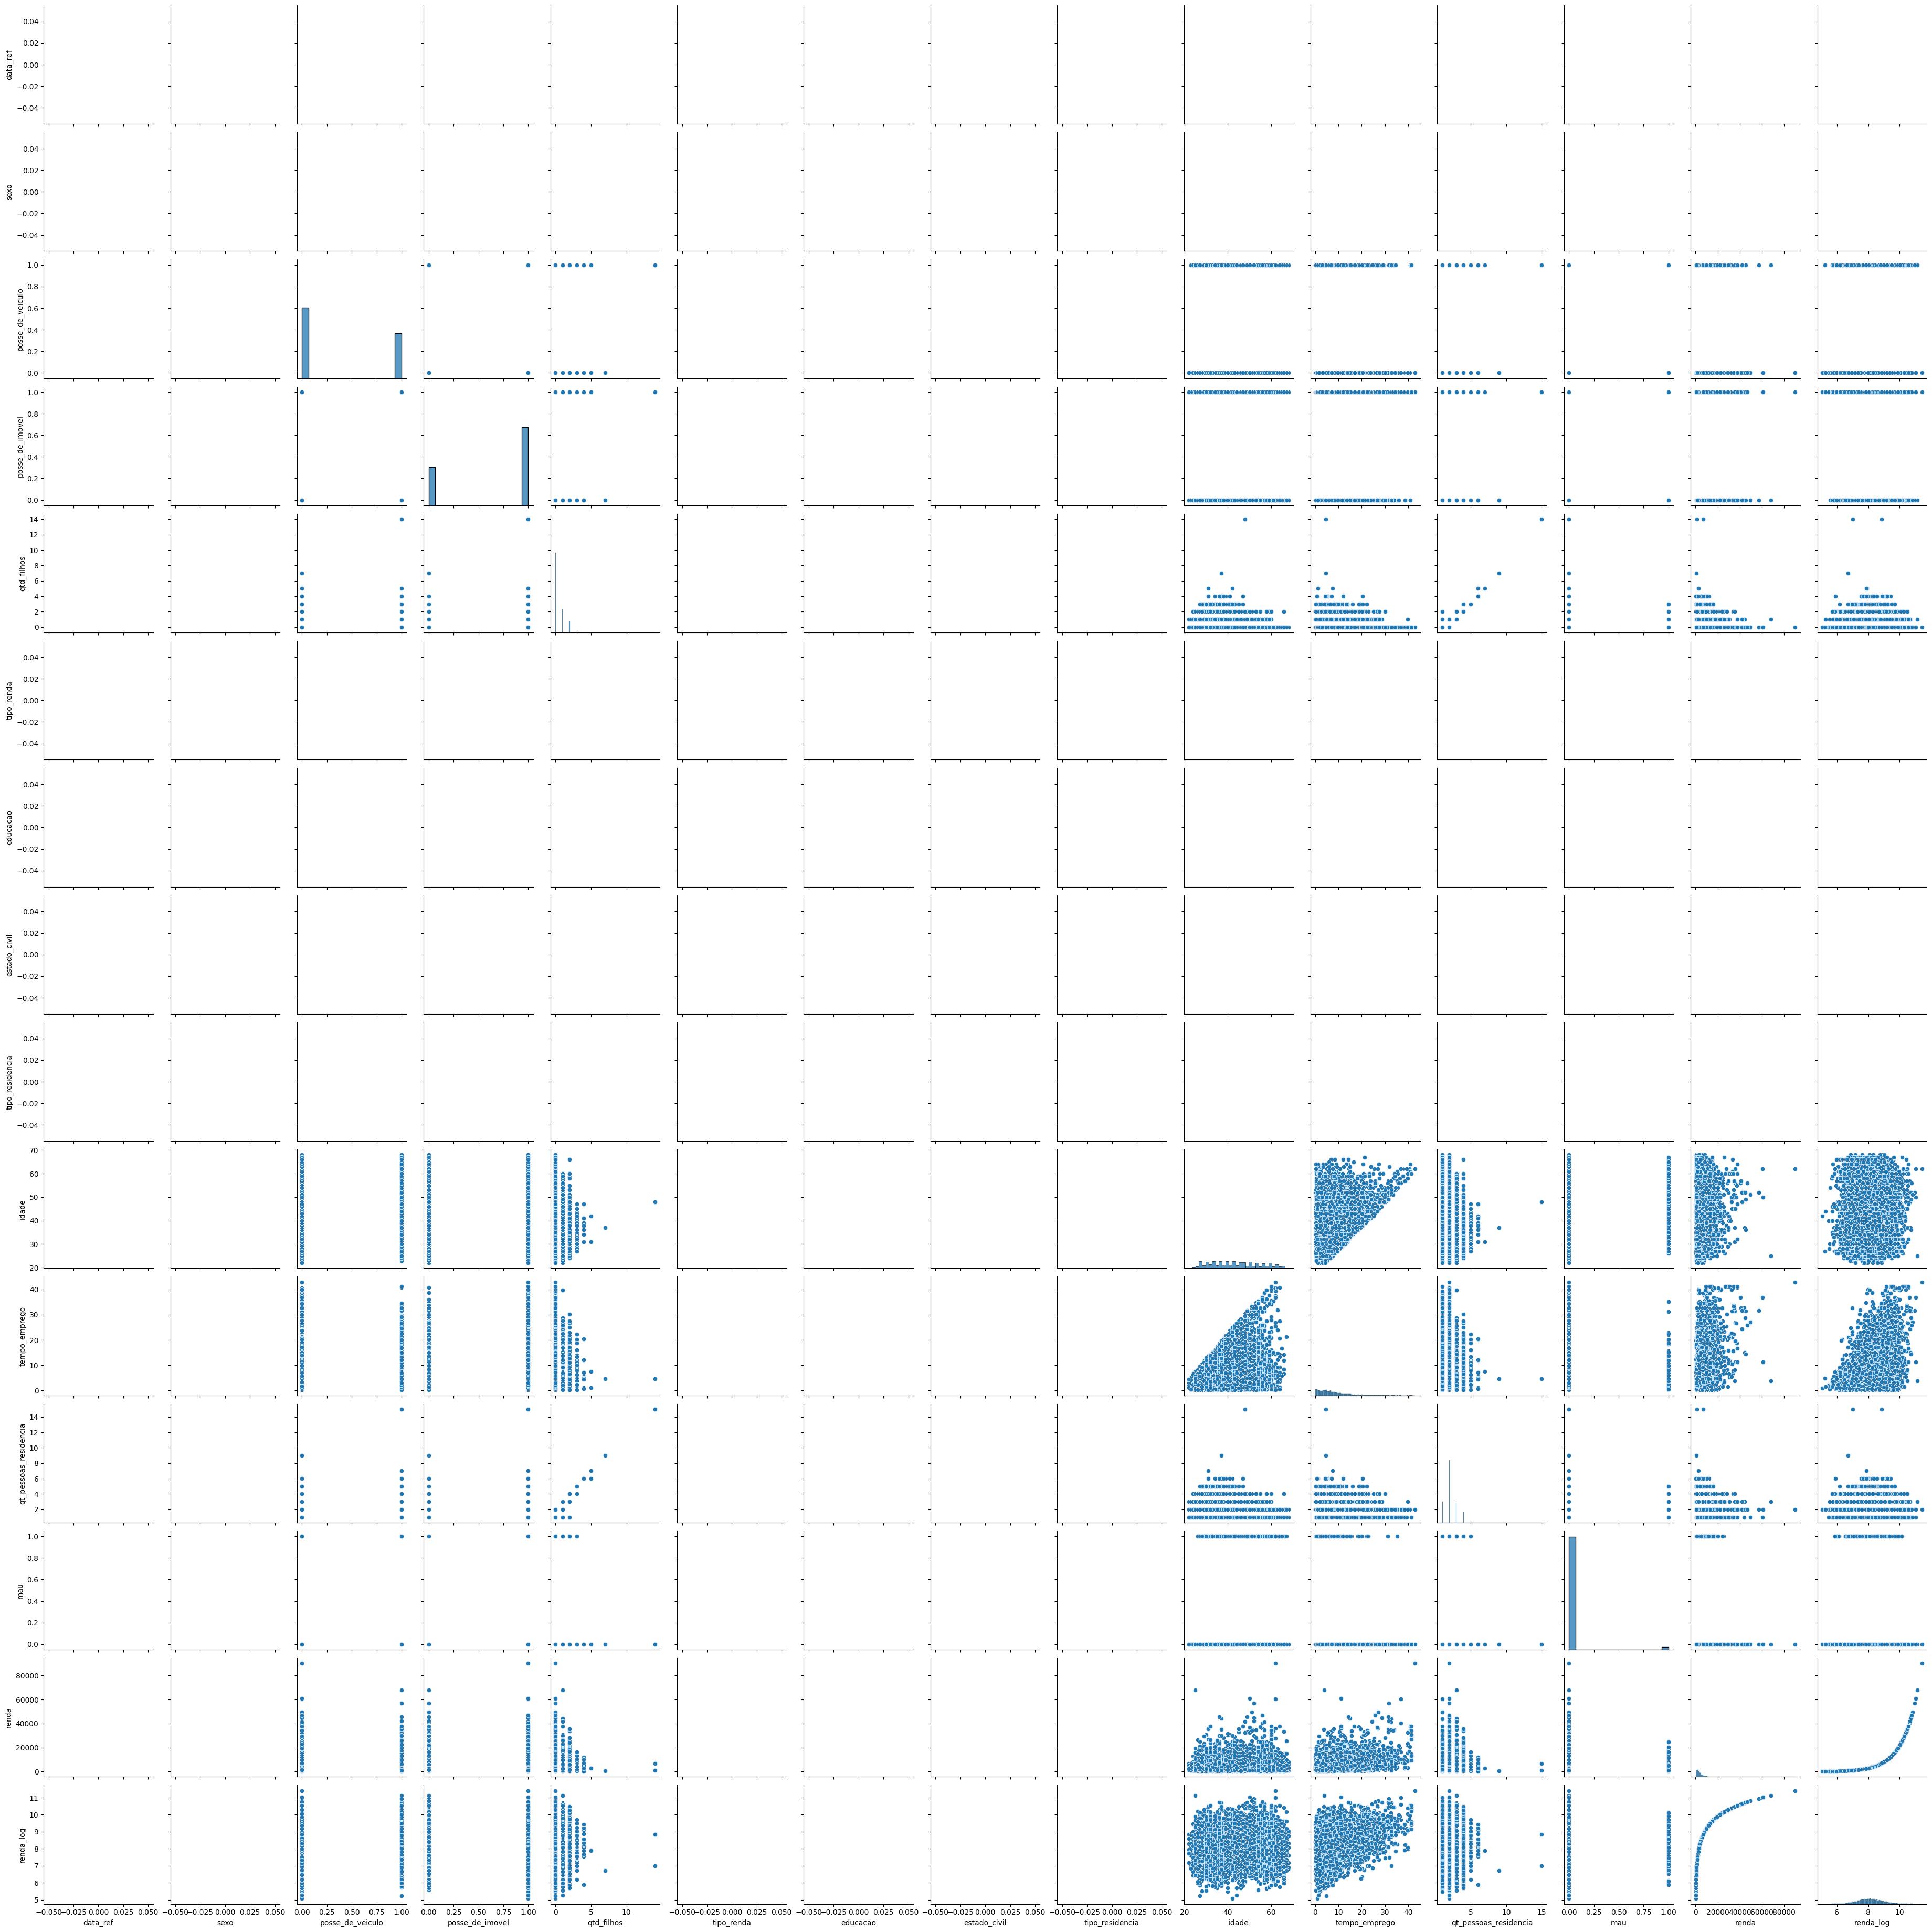

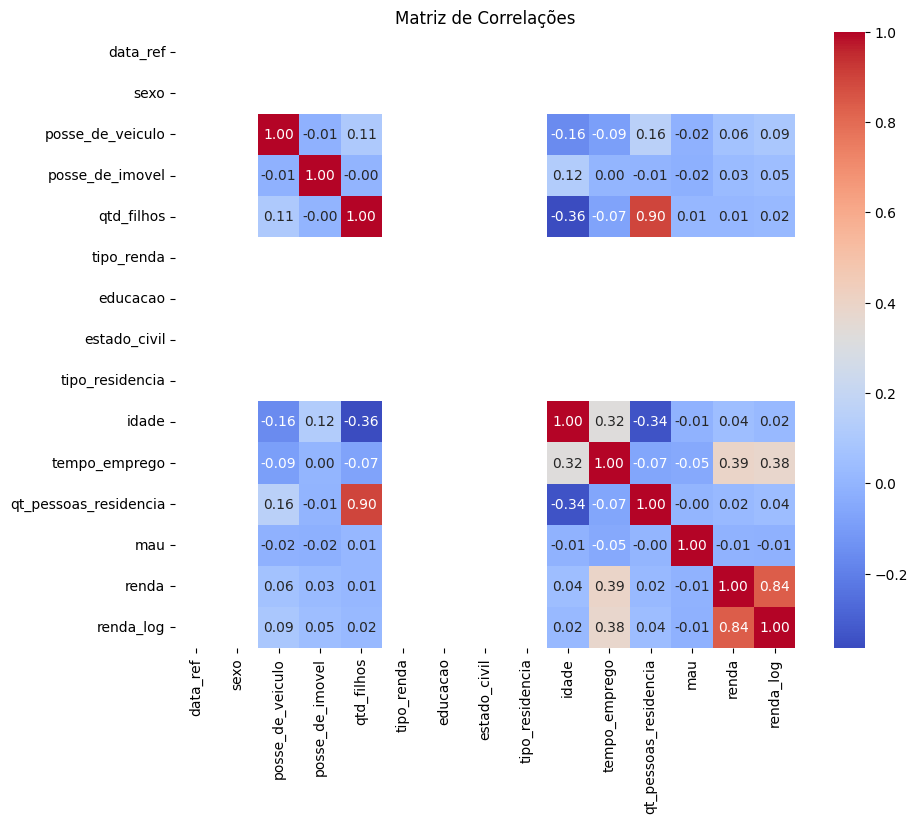

In [14]:
# Carregando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculando o logaritmo da variável "renda"

df['renda_log'] = df['renda'].apply(lambda x: None if x <= 0 else round(math.log(x), 2))
 

df = df.apply(pd.to_numeric, errors='coerce') 


# Avaliando a estrutura de correlação das variáveis quantitativas através de um gráfico de matriz de dispersão
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
correlation_matrix = df.corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlações')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:


O Mapa de Calor continua com poucas modificações, mas sem dúvidas alguns dos gráficos estão mais aptos a serem interpretados